In [ ]:
!pip install "unstructured[all-docs]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.1/529.1 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 106.9 MB/s eta 0:00:00
  

In [ ]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 1s (218 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import requests

global file_path

print("Choose \n 1 if file is uploaded \n 2 for download link  ")
print("\n")
choice = input("Your choice:")
print("\n")

if choice == '1':
    file_path = input("Enter the name of the uploaded file: ")
    print(f"You chose to use the uploaded file: {file_path}")



elif choice == '2':
    URL = input("Enter the download link of the pdf: ")
    download_filename = "downloaded_file"
    response = requests.get(URL)
    if response.status_code== 200 :
      with open(download_filename,"wb") as file:
        file.write(response.content)
      file_path = download_filename

      print(f"The file has been downloaded and saved as {download_filename}")

    else:
      print(f"Failed to Download the file. Status Code: {response.status_code}")
      file_path = None


else:
    print("Invalid choice. Please run the cell again and enter 1 or 2.")

Choose 
 1 if file is uploaded 
 2 for download link  


Your choice:1


Enter the name of the uploaded file: indtxt.pdf
You chose to use the uploaded file: indtxt.pdf


In [ ]:
from unstructured.partition.pdf import partition_pdf


chunks = partition_pdf(
      filename=file_path,
      languages=["eng", "urd","ind","msa","fra","spa","deu"],
      infer_table_structure=True,            # extract tables
      strategy="hi_res",                     # mandatory to infer tables

      extract_image_block_types=[],   # Set to empty list to not extract images

      extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

      chunking_strategy="by_title",          # or 'basic'
      max_characters=7000,                  # defaults to 500
      combine_text_under_n_chars=1500,       # defaults to 0
      new_after_n_chars=7000,
      overlap=50, # Add this line to specify overlap
      clean_extra_whitespace=True # Add this line to clean extra whitespace
  )


chunks = [chunk for chunk in chunks if chunk.text]

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [ ]:
print(f"Number of chunks: {len(chunks)}")
if len(chunks) > 0:

  print("Inspecting the first chunk:")
  display(chunks[0].metadata.orig_elements)
else:
  print("The 'chunks' list is empty.")

Number of chunks: 1
Inspecting the first chunk:


In [ ]:
all_elements = []

for chunk in chunks:
    if hasattr(chunk, 'metadata') and hasattr(chunk.metadata, 'orig_elements'):
        all_elements.extend(chunk.metadata.orig_elements)

chunk_images = [el for el in all_elements if 'Image' in str(type(el))]

if chunk_images:
    display(chunk_images[0].to_dict())
else:
    print("No image elements found in the chunks.")

No image elements found in the chunks.


In [ ]:
len(chunks)

1

In [ ]:
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [ ]:
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)) and hasattr(el.metadata, 'image_base64') and el.metadata.image_base64 is not None:
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)


In [ ]:
for i, chunk in enumerate(chunks):
  print(f"Chunk {i+1}:\n{chunk.text}\n---")

Chunk 1:
Puisi: “Di Bawah Langit Nusantara”

Di bawah langit biru Nusantara,

aku melangkah di antara bayang pohon kelapa,

angin membawa bisik laut ke telingaku,

tentang pulau-pulau yang tak pernah lelah menunggu.

Di setiap pantai, pasir berbisik,

tentang cinta yang hilang dan kembali lagi,

ombak menari, menepuk bumi,

seperti ibu yang meninabobokan anaknya dengan lembut sekali.

Gunung tersenyum di kejauhan,

diselimuti kabut pagi yang lembut,

dan sawah terbentang bagai permadani hijau,

di mana doa petani naik bersama embun ke langit yang biru.

Aku mendengar suara masa lalu,

di antara daun-daun pisang yang bergoyang pelan,

tentang perjuangan, tentang luka,

tentang tawa yang tetap hidup meski hujan turun derasnya.

Malam datang dengan selimut bintang,

bulan menari di atas laut tenang,

dan aku menulis namamu di udara,

agar angin membawa cintaku ke mana saja.

Oh, tanah airku yang penuh cerita,

engkau adalah puisi yang tak pernah selesai kutulis, setiap hembusan anginmu ad

In [ ]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):

    image_data = base64.b64decode(base64_code)

    display(Image(data=image_data))

if images:
    display_base64_image(images[0])
else:
    print("No images to display.")

No images to display.


In [ ]:
if tables:
  print("Displaying Tables:")
  for i, table in enumerate(tables):
      print(f"Table {i+1}:\n{table.text}\n---")
else:
  print("No tables were extracted from the PDF.")

No tables were extracted from the PDF.


In [ ]:
!pip install -U torch # requires torch 2.1.1+ (for efficient sdpa implementation)
!pip install tqdm # for progress bars
!pip install sentence-transformers # for embedding models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

In [ ]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", trust_remote_code=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
%%time

from tqdm.auto import tqdm
import numpy as np

chunk_texts = [chunk.text for chunk in chunks]

chunk_embeddings = []
for text in tqdm(chunk_texts, desc="Generating Embeddings"):

    embedding = embedding_model.encode(text, show_progress_bar=False)
    chunk_embeddings.append(embedding)


chunk_embeddings = np.array(chunk_embeddings)

print(f"Shape of chunk embeddings: {chunk_embeddings.shape}")

Generating Embeddings:   0%|          | 0/1 [00:00<?, ?it/s]

Shape of chunk embeddings: (1, 768)
CPU times: user 1.95 s, sys: 28.2 ms, total: 1.98 s
Wall time: 2.43 s


In [ ]:
display(chunk_embeddings)

array([[-7.53043732e-03,  2.77633518e-02, -8.75630006e-02,
        -5.26359342e-02, -1.65955480e-02, -4.18335050e-02,
        -6.74228892e-02,  9.76833627e-02,  2.37594079e-02,
        -1.14868842e-02,  1.51354810e-02, -4.48349826e-02,
        -6.57059774e-02,  6.54592887e-02, -5.02822846e-02,
        -1.26580996e-02,  5.82217686e-02, -4.80969623e-03,
         4.44273800e-02,  6.04522116e-02,  1.21535525e-01,
         2.79928837e-02,  7.21223827e-04,  1.31691039e-01,
         5.43118294e-05,  1.14999168e-01,  1.14909902e-01,
        -7.31006935e-02, -5.87516427e-02, -5.46476431e-02,
        -1.00424737e-01, -1.96600389e-02,  3.10075488e-02,
         4.48146760e-02,  3.45914951e-03, -6.00646436e-02,
         1.25934603e-02,  1.52688222e-02,  3.29620317e-02,
        -6.49425909e-02,  2.29814630e-02,  4.21409979e-02,
        -9.93799139e-03, -7.50260660e-03,  1.55656142e-02,
        -8.74295365e-03,  3.91970389e-04, -3.59781720e-02,
         1.16051193e-02, -4.20514755e-02,  5.86742200e-0

In [ ]:
chunk_embeddings.shape

(1, 768)

In [ ]:
import torch
from sentence_transformers import util
import numpy as np # Import numpy

query="Single entries from other screens"
print(f"Query: {query}")

# embedding_model_name = "Alibaba-NLP/gte-multilingual-base" # Removed unnecessary variable
query_embedding_np = embedding_model.encode(str(query)) # Ensure query is a standard string
query_embedding = torch.tensor(query_embedding_np, dtype=torch.float32).to("cpu") # Convert numpy array to torch tensor

from time import perf_counter as timer

start_time = timer()
embeddings_tensor = torch.tensor(chunk_embeddings, dtype=torch.float32).to("cpu")

cos_sim  = util.cos_sim(a=query_embedding, b= embeddings_tensor)[0]
end_time= timer()

print(f"[INFO] Time taken to get scores on {len(embeddings_tensor)} embeddings: {end_time - start_time: .5f} seconds.")

k = min(5, len(embeddings_tensor))
if k > 0:
    top_results_cos_sim = torch.topk(cos_sim, k=k)
    print(top_results_cos_sim)
else:
    print("No embeddings available to get top results from.")

Query: Single entries from other screens
[INFO] Time taken to get scores on 1 embeddings:  0.00724 seconds.
torch.return_types.topk(
values=tensor([0.3827]),
indices=tensor([0]))


In [ ]:
%pip install -U sentence-transformers

In [ ]:
from sentence_transformers import CrossEncoder

reranker = CrossEncoder('Alibaba-NLP/gte-multilingual-reranker-base', trust_remote_code=True)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/612M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [ ]:
top_result_indices = top_results_cos_sim.indices.tolist()

top_chunks_text = [chunks[i].text for i in top_result_indices]

rerank_pairs = [[query, chunk_text] for chunk_text in top_chunks_text]

rerank_scores = reranker.predict(rerank_pairs)

reranked_sorted_indices = [idx for _, idx in sorted(zip(rerank_scores, top_result_indices), key=lambda pair: pair[0], reverse=True)]
reranked_sorted_scores = sorted(rerank_scores, reverse=True)


print("Reranked Top 5 Results using Alibaba-NLP/gte-multilingual-reranker-base:")
for i, idx in enumerate(reranked_sorted_indices):
    print(f"Rank {i+1}: Chunk {idx+1} (Score: {reranked_sorted_scores[i]:.4f})")
    print(f"Content: {chunks[idx].text[:200]}...")
    print("---")

Reranked Top 5 Results using Alibaba-NLP/gte-multilingual-reranker-base:
Rank 1: Chunk 1 (Score: 0.0675)
Content: Puisi: “Di Bawah Langit Nusantara”

Di bawah langit biru Nusantara,

aku melangkah di antara bayang pohon kelapa,

angin membawa bisik laut ke telingaku,

tentang pulau-pulau yang tak pernah lelah men...
---


In [ ]:
%pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 33.1 MB/s eta 0:00:00


Displaying images from the top ranked pages: [1]


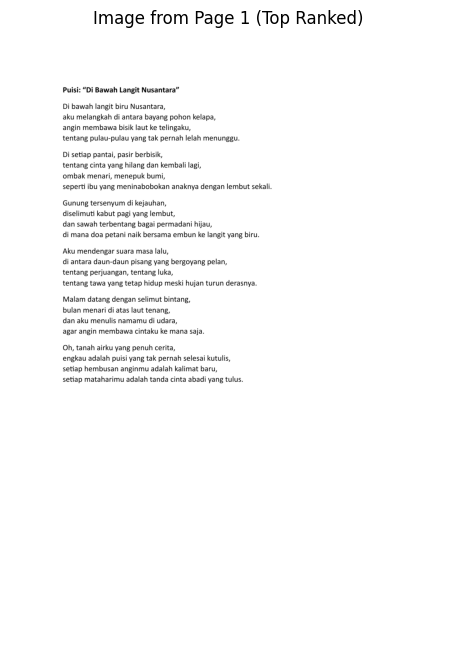

In [ ]:
import fitz
import matplotlib.pyplot as plt
import numpy as np

top_page_numbers = sorted(list(set([chunks[idx].metadata.page_number for idx in reranked_sorted_indices])))

print(f"Displaying images from the top ranked pages: {top_page_numbers}")

pdf_path = file_path

doc = fitz.open(pdf_path)

for page_num in top_page_numbers:

    page = doc.load_page(page_num - 1)


    img = page.get_pixmap(dpi=150)
    if img.n == 1:
        img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w))
        cmap = 'gray'
    else:
        img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))
        cmap = None


    plt.figure(figsize=(10, 8))
    plt.imshow(img_array, cmap=cmap)
    plt.title(f"Image from Page {page_num} (Top Ranked)")
    plt.axis('off')
    plt.show()


doc.close()

In [ ]:
import fitz
import matplotlib.pyplot as plt
import numpy as np
import torch
from sentence_transformers import util

def retrieve_and_display_images(query, model, reranker, chunks, pdf_path, top_k=5):

    print(f"Processing query: {query}")


    query_embedding = model.encode(query, convert_to_tensor=True).to("cpu").to(torch.float32)


    if 'chunk_embeddings' not in globals():
        print("Error: chunk_embeddings not found. Please run the embedding cell first.")
        return

    embeddings_tensor = torch.tensor(chunk_embeddings, dtype=torch.float32).to("cpu")



    cos_sim = util.cos_sim(a=query_embedding, b=embeddings_tensor)[0]


    top_results_cos_sim = torch.topk(cos_sim, k=top_k)
    top_result_indices = top_results_cos_sim.indices.tolist()
    top_chunks_text = [chunks[i].text for i in top_result_indices]


    rerank_pairs = [[query, chunk_text] for chunk_text in top_chunks_text]
    rerank_scores = reranker.predict(rerank_pairs)


    reranked_sorted_indices = [idx for _, idx in sorted(zip(rerank_scores, top_result_indices), key=lambda pair: pair[0], reverse=True)]

    print("\nReranked Top Results:")
    for i, idx in enumerate(reranked_sorted_indices):
        print(f"Rank {i+1}: Chunk {idx+1} (Score: {rerank_scores[i]:.4f})")
        print(f"Content: {chunks[idx].text[:100]}...")
        print(f"Page: {chunks[idx].metadata.page_number}")
        print("---")


    top_page_numbers = sorted(list(set([chunks[idx].metadata.page_number for idx in reranked_sorted_indices])))

    print(f"\nDisplaying images from the top ranked pages: {top_page_numbers}")

    try:
        doc = fitz.open(pdf_path)
        for page_num in top_page_numbers:
            try:

                page = doc.load_page(page_num - 1)


                img = page.get_pixmap(dpi=150)


                if img.n == 1:
                    img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w))
                    cmap = 'gray'
                else:
                    img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))
                    cmap = None

                plt.figure(figsize=(10, 8))
                plt.imshow(img_array, cmap=cmap)
                plt.title(f"Image from Page {page_num} (Top Ranked)")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error displaying image from page {page_num}: {e}")
        doc.close()
    except FileNotFoundError:
        print(f"Error: PDF file not found at {pdf_path}")
    except Exception as e:
        print(f"An error occurred while processing the PDF: {e}")




In [ ]:
import google.generativeai as genai
from google.colab import userdata

# Get the API key from Colab's secrets manager
GOOGLE_API_KEY = userdata.get('python')

# Configure the genai library with the API key
genai.configure(api_key=GOOGLE_API_KEY)

# Now you can use the models directly, without explicitly creating a client instance
model = genai.GenerativeModel('gemini-2.5-flash')

response = model.generate_content(
    contents="Explain how AI works in a few words",
)

print(response.text)

AI learns patterns from data to make predictions or decisions.


In [ ]:
if 'query' not in globals():
    query = "What is the process for creating a sales invoice?"
    print(f"Using sample query: {query}")
else:
    print(f"Using existing query: {query}")


context_chunks = []
if 'reranked_sorted_indices' in globals():
    context_chunks = [chunks[idx] for idx in reranked_sorted_indices]
    print(f"Using {len(context_chunks)} reranked top chunks for context.")
elif 'top_result_indices' in globals():
     context_chunks = [chunks[idx] for idx in top_result_indices]
     print(f"Using {len(context_chunks)} initial top chunks for context (reranking not used or variable not found).")
else:
     print("Error: Top result indices not found. Please ensure retrieval/reranking steps were run successfully.")


if context_chunks:

    context_text = "\n---\n".join([f"Chunk from Page {chunk.metadata.page_number}:\n{chunk.text}" for chunk in context_chunks])


    prompt = f"""You are an AI assistant that answers questions based on the provided context.
Read the following context carefully and answer the question below.
If the answer cannot be found in the context, state that you cannot answer based on the provided information.
Keep your answer concise and directly address the question.

Context:
{context_text}

Question:
{query}

Answer:
"""
    print("\nFormatted Prompt (first 500 characters):")
    print(prompt[:500] + "...")
else:
    prompt = "Could not generate prompt due to missing context chunks."
    print(prompt)

Using existing query: Single entries from other screens
Using 1 reranked top chunks for context.

Formatted Prompt (first 500 characters):
You are an AI assistant that answers questions based on the provided context.
Read the following context carefully and answer the question below.
If the answer cannot be found in the context, state that you cannot answer based on the provided information.
Keep your answer concise and directly address the question.

Context:
Chunk from Page 1:
Puisi: “Di Bawah Langit Nusantara”

Di bawah langit biru Nusantara,

aku melangkah di antara bayang pohon kelapa,

angin membawa bisik laut ke telingaku,

...


In [ ]:

try:
    gemini_model = genai.GenerativeModel('gemini-2.5-flash')


    response = gemini_model.generate_content(prompt)


    print("\nGenerated Answer:")
    print(response.text)

except Exception as e:
    print(f"Error generating response from Gemini API: {e}")
    print("Please ensure you have run the cell to initialize the Gemini client (Step 3).")


Generated Answer:
Saya tidak bisa menjawab berdasarkan informasi yang diberikan.


In [ ]:
import fitz
import matplotlib.pyplot as plt
import numpy as np
import torch
from sentence_transformers import util
import google.generativeai as genai
from google.colab import userdata
import textwrap # Import textwrap
from sentence_transformers import SentenceTransformer # Import SentenceTransformer

try:
    google_api_key = userdata.get('GOOGLE_API_KEY')
    if google_api_key:
        genai.configure(api_key=google_api_key)

    else:
        print("GOOGLE_API_KEY not found. Gemini client not configured for pipeline.")
except Exception as e:
    print(f"Error configuring Gemini client for pipeline: {e}")




def rag_pipeline(query, embedding_model_obj, chunks, chunk_embeddings, pdf_path, top_k=5, use_reranker=True, reranker=None, max_output_tokens=1024, display_images=True):


    print(f"Processing query through RAG pipeline: {query}")

    query_embedding = embedding_model_obj.encode(query, convert_to_tensor=True).to("cpu").to(torch.float32)


    embeddings_tensor = torch.tensor(chunk_embeddings, dtype=torch.float32).to("cpu")


    cos_sim = util.cos_sim(a=query_embedding, b=embeddings_tensor)[0]

    # Ensure k is not greater than the number of available chunks
    k = min(top_k, len(chunks))
    if k == 0:
        print("No chunks available to retrieve results from.")
        return "No relevant context found to answer the query."


    top_results_cos_sim = torch.topk(cos_sim, k=k)
    top_result_indices = top_results_cos_sim.indices.tolist()


    if use_reranker:
        if reranker is None:
            print("Warning: Reranker is not provided but use_reranker is True. Skipping reranking.")
            context_indices = top_result_indices
        else:
            print(f"Reranking top {k} results.")
            top_chunks_text = [chunks[i].text for i in top_result_indices]
            rerank_pairs = [[query, chunk_text] for chunk_text in top_chunks_text]
            rerank_scores = reranker.predict(rerank_pairs)
            context_indices = [idx for _, idx in sorted(zip(rerank_scores, top_result_indices), key=lambda pair: pair[0], reverse=True)]
    else:
        context_indices = top_result_indices


    context_chunks_for_llm = [chunks[idx] for idx in context_indices]

    if not context_chunks_for_llm:

        if display_images:

             top_page_numbers = sorted(list(set([chunks[idx].metadata.page_number for idx in top_result_indices])))
             print(f"\nNo relevant text context found, but displaying images from top initial result pages: {top_page_numbers}")

             try:
                 doc = fitz.open(pdf_path)
                 for page_num in top_page_numbers:
                     try:
                         page = doc.load_page(page_num - 1)
                         img = page.get_pixmap(dpi=150)
                         if img.n == 1:
                             img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w))
                             cmap = 'gray'
                         else:
                             img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))
                             cmap = None
                         plt.figure(figsize=(10, 8))
                         plt.imshow(img_array, cmap=cmap)
                         plt.title(f"Image from Page {page_num} (Top Result)")
                         plt.axis('off')
                         plt.show()
                     except Exception as e:
                         print(f"Error displaying image from page {page_num}: {e}")
                 doc.close()
             except FileNotFoundError:
                 print(f"Error: PDF file not found at {pdf_path}")
             except Exception as e:
                 print(f"An error occurred while processing the PDF for image display: {e}")
        return "No relevant context found to answer the query."

    context_text = "\n---\n".join([f"Chunk from Page {chunk.metadata.page_number}:\n{chunk.text}" for chunk in context_chunks_for_llm])



    if display_images:

        context_page_numbers = sorted(list(set([chunk.metadata.page_number for chunk in context_chunks_for_llm])))
        print(f"\nDisplaying images from the context pages: {context_page_numbers}")

        try:
            doc = fitz.open(pdf_path)
            for page_num in context_page_numbers:
                try:

                    page = doc.load_page(page_num - 1)


                    img = page.get_pixmap(dpi=150)


                    if img.n == 1:
                        img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w))
                        cmap = 'gray'
                    else:
                        img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))
                        cmap = None

                    plt.figure(figsize=(10, 8))
                    plt.imshow(img_array, cmap=cmap)
                    plt.title(f"Image from Page {page_num} (Context)")
                    plt.axis('off')
                    plt.show()
                except Exception as e:
                    print(f"Error displaying image from page {page_num}: {e}")
            doc.close()
        except FileNotFoundError:
            print(f"Error: PDF file not found at {pdf_path}")
        except Exception as e:
            print(f"An error occurred while processing the PDF for image display: {e}")



    prompt = f"""You are an AI assistant that answers questions based on the provided context.
Read the following context carefully and provide a detailed answer to the question below.
If the answer cannot be found in the context, state that you cannot answer based on the provided information.

Context:
{context_text}

Question:
{query}

Detailed Answer:
"""

    try:

        if 'gemini_model' not in globals() or not isinstance(gemini_model, genai.GenerativeModel):
             llm_model = genai.GenerativeModel('gemini-2.5-flash')
        else:
             llm_model = gemini_model


        response = llm_model.generate_content(prompt, generation_config=genai.GenerationConfig(max_output_tokens=max_output_tokens))
        return response.text
    except Exception as e:
        return f"Error generating response from LLM: {e}"

Error configuring Gemini client for pipeline: Secret GOOGLE_API_KEY does not exist.


Processing query through RAG pipeline: what is the poem about
Reranking top 1 results.

Displaying images from the context pages: [1]


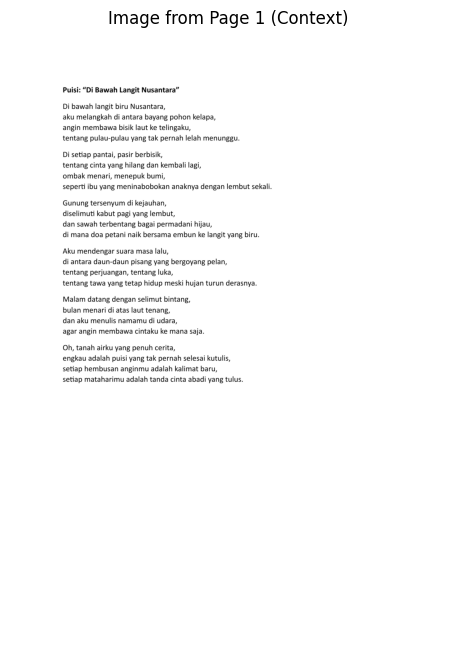

The poem "Di Bawah Langit Nusantara" is about the profound love and connection
the speaker feels for their homeland, Nusantara (the Indonesian archipelago). It
vividly describes the diverse natural beauty of the region, including: *   The
blue skies, palm trees, and the whispers of the sea. *   Beaches with whispering
sands and dancing waves. *   Distant mountains covered in mist and expansive
green rice fields.  Beyond the scenery, the poem also touches upon: *   The
sounds of the past, mentioning struggles, wounds, and enduring laughter. *   A
personal, perhaps romantic, element of writing a name in the air to be carried
by the wind.  Ultimately, the poem culminates in a heartfelt declaration that
the homeland is a "poem that is never finished," where every breath of wind is a
new sentence and every sunrise a sign of eternal, sincere love. It celebrates
the natural grandeur, historical depth, and the deep emotional bond with the
land.


In [ ]:
import textwrap

query = "what is the poem about"
generated_answer = rag_pipeline(query, embedding_model, chunks, chunk_embeddings, file_path, top_k=5, use_reranker=True, reranker=reranker, max_output_tokens=7000, display_images=True)

wrapped_answer = textwrap.fill(generated_answer, width=80)
print(wrapped_answer)